In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
data1 = pd.read_csv('C:/Users/teleu/.data/Panaretos/ML & AI Seminar/heart_failure_clinical_records_dataset.csv')
data1.head() #Categorical variables have been encoded as '0' and '1'.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print(data1.dtypes)
data1['diabetes'] = data1['diabetes'].astype('category')
data1['high_blood_pressure'] = data1['high_blood_pressure'].astype('category')
data1['smoking'] = data1['smoking'].astype('category')
data1['sex'] = data1['sex'].astype('category')
data1['anaemia'] = data1['anaemia'].astype('category')
data1['DEATH_EVENT'] = data1['DEATH_EVENT'].astype('category')

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [4]:
print(data1.dtypes)

age                          float64
anaemia                     category
creatinine_phosphokinase       int64
diabetes                    category
ejection_fraction              int64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                     category
time                           int64
DEATH_EVENT                 category
dtype: object


In [5]:
data1 = data1.rename(columns = {'creatinine_phosphokinase': 'creatinine_pk'})
print(data1.isnull().sum()) #No missing values.

age                    0
anaemia                0
creatinine_pk          0
diabetes               0
ejection_fraction      0
high_blood_pressure    0
platelets              0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
time                   0
DEATH_EVENT            0
dtype: int64


In [52]:
e_f_stats = data1['ejection_fraction'].describe() #299 rows in the dataset.
print(f"Basic statistics of ejection fraction:\n{e_f_stats}")
'''
Sizeable difference between 75% and Max value however,
80% is still a believable amount and not indicating of outlier. 
'''

Basic statistics of ejection fraction:
count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64


'\nSizeable difference between 75% and Max value however,\n80% is still a believable amount and not indicating of outlier. \n'

In [51]:
d_e_counts = data1['DEATH_EVENT'].value_counts()
print(f"Patients who survived:\n{d_e_counts}")

Patients who survived:
0    203
1     96
Name: DEATH_EVENT, dtype: int64


C:\Users\teleu\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


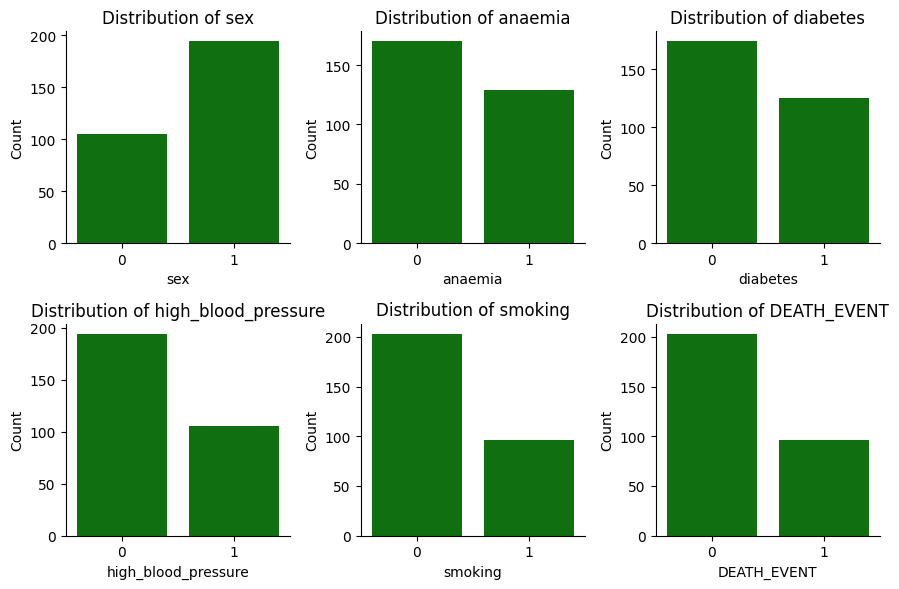

In [7]:
numerical_cols = ['age','creatinine_pk','ejection_fraction',
                 'platelets','serum_creatinine','serum_sodium','time']
categorical_cols = ['sex','anaemia','diabetes','high_blood_pressure','smoking','DEATH_EVENT']

cat_melted = data1.melt(value_vars = categorical_cols)
g = sns.FacetGrid(cat_melted, col = 'variable', col_wrap = 3, sharex = False, sharey = False)
g.map(sns.countplot, "value", color = 'green')
for ax, title in zip(g.axes,categorical_cols):
    ax.set_title(f'Distribution of {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

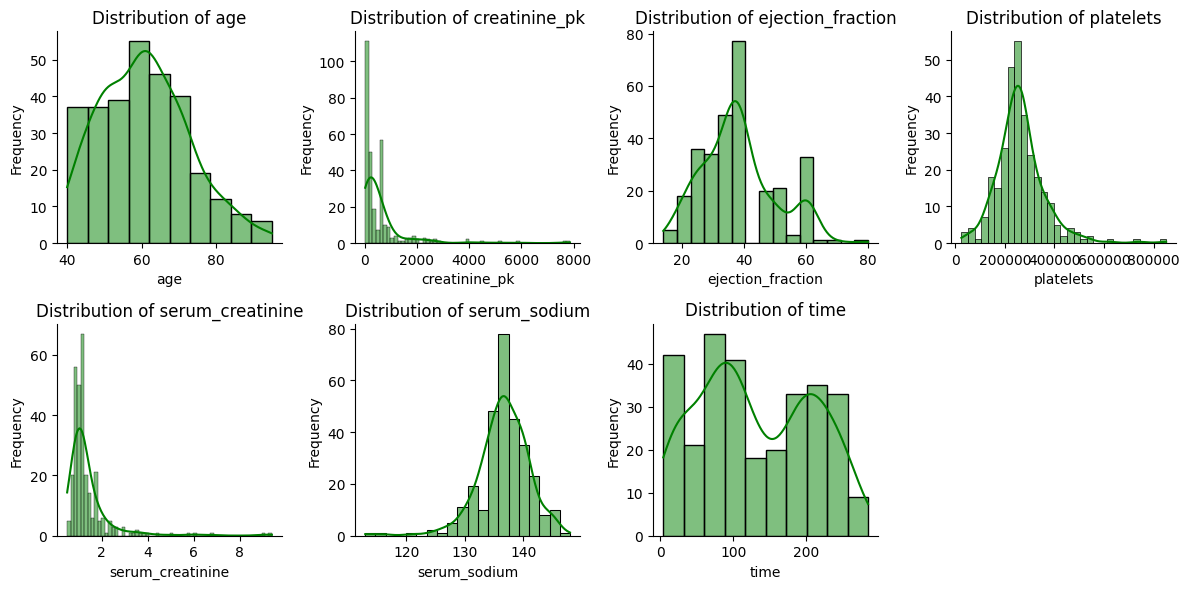

In [8]:
num_melted = data1.melt(value_vars = numerical_cols)
g = sns.FacetGrid(num_melted, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
g.map(sns.histplot, 'value', color = 'green', kde = True)
for ax, title in zip(g.axes, numerical_cols):
    ax.set_title(f'Distribution of {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\teleu\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


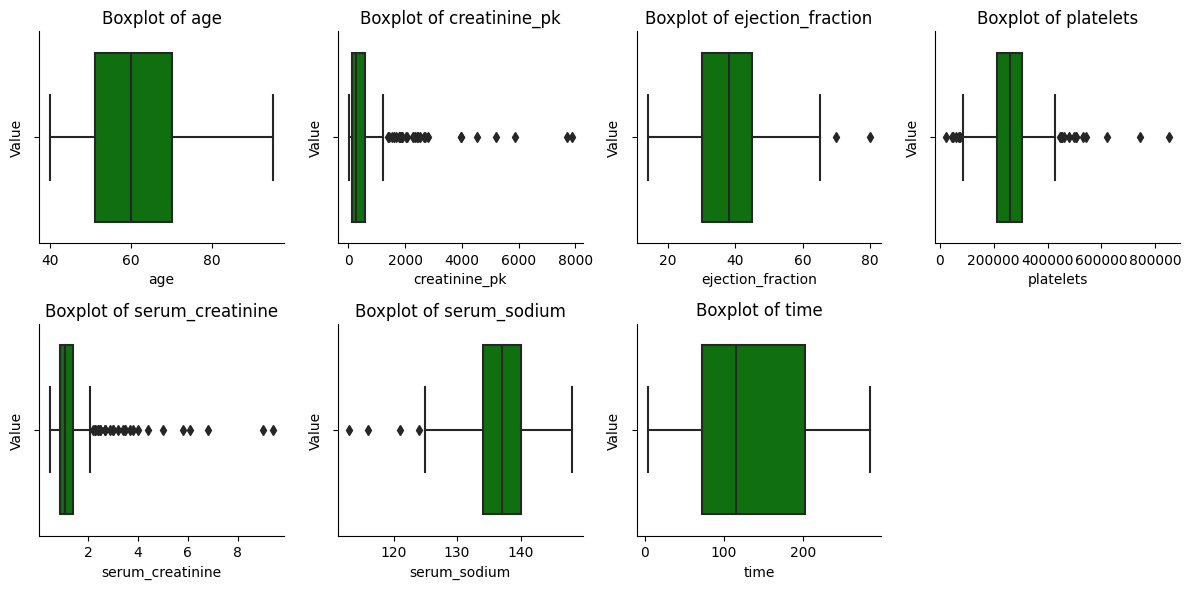

In [9]:
g = sns.FacetGrid(num_melted, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
g.map(sns.boxplot, 'value', color = 'green')
for ax, title in zip(g.axes, numerical_cols):
    ax.set_title(f'Boxplot of {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Value')
    
plt.tight_layout()
plt.show()

In [10]:
#Taking care of clinically improbable values/incorrect entries.
data = data1[(data1['creatinine_pk'] <= 3500) & 
             (data1['platelets'] <= 600000) &
             (data1['serum_sodium'] >= 120)]
#Serum creatinine values above 5 appear as outliers but they are clinically probable.
print("Original data shape:", data1.shape)
print("Cleaned data shape:", data.shape)

Original data shape: (299, 13)
Cleaned data shape: (287, 13)


In [11]:
numerical_data = data[numerical_cols]
correlation_matrix = numerical_data.corr().round(2)
from IPython.display import display
display(correlation_matrix)

,age,creatinine_pk,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.00,-0.10,0.07,-0.01,0.17,-0.02,-0.23
creatinine_pk,-0.10,1.00,-0.07,-0.05,-0.07,0.06,0.15
ejection_fraction,0.07,-0.07,1.00,0.07,-0.04,0.15,0.02
platelets,-0.01,-0.05,0.07,1.00,-0.04,0.05,0.00
serum_creatinine,0.17,-0.07,-0.04,-0.04,1.00,-0.23,-0.13
serum_sodium,-0.02,0.06,0.15,0.05,-0.23,1.00,0.10
time,-0.23,0.15,0.02,0.00,-0.13,0.10,1.00


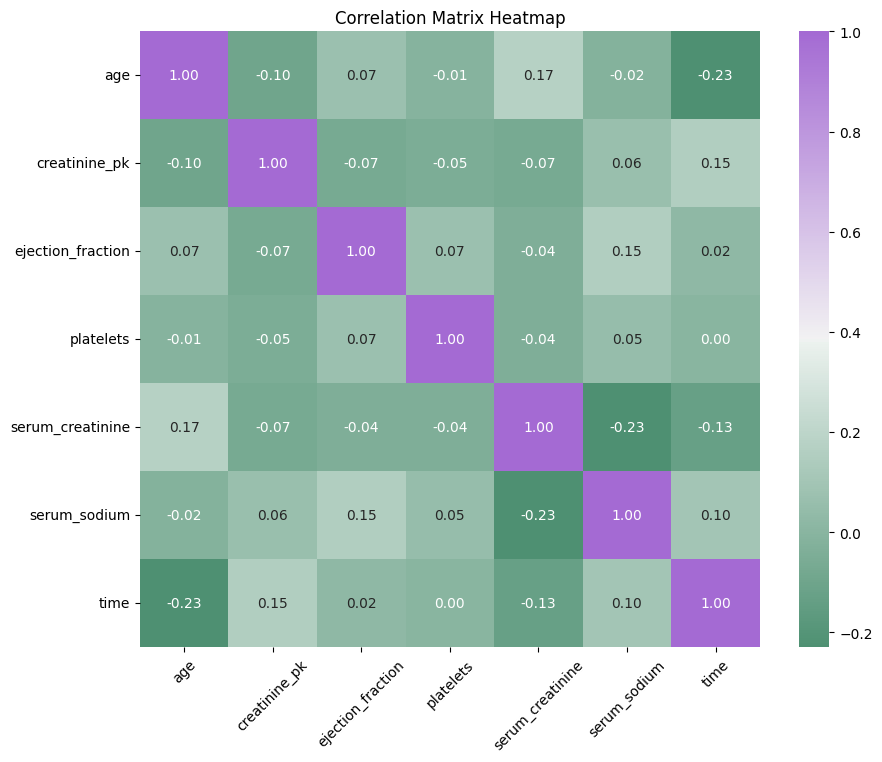

In [12]:
plt.figure(figsize = (10,8))
custom_cmap = sns.diverging_palette(150, 285, s = 65, l = 55, n = 12, center = 'light', as_cmap = True)
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = custom_cmap, cbar = True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation = 45)
plt.show() #No significant correlations can be seen here.

In [13]:
from sklearn.model_selection import train_test_split

X1 = data.drop(columns = 'ejection_fraction')
y = data['ejection_fraction']

#Using 70-15-15 (train-test-validation) split.
X1_train, X1_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.3, random_state=99)
X1_val, X1_test, y_val, y_test = train_test_split(X1_temp, y_temp, test_size=0.5, random_state=99)

In [14]:
#Random Forest Method for Feature Selection.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 99)
rf.fit(X1_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance' : feature_importances
}).sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

                Feature  Importance
10                 time    0.177201
2         creatinine_pk    0.158536
5             platelets    0.147844
0                   age    0.129878
6      serum_creatinine    0.105009
7          serum_sodium    0.102126
11          DEATH_EVENT    0.090190
1               anaemia    0.021322
8                   sex    0.017498
9               smoking    0.017160
3              diabetes    0.016673
4   high_blood_pressure    0.016562


In [15]:
#Applying the features we want to use.
X = data[['time', 'age', 'creatinine_pk', 'platelets', 'serum_sodium', 'DEATH_EVENT', 'serum_creatinine']]
y = data['ejection_fraction']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 99)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 99)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (200, 7)
Test set shape: (44, 7)
Validation set shape: (43, 7)


In [16]:
#Random Forest Regression.
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor(random_state = 99)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print("Random Forest Validation set - Mean Squared Error: {:.2f}".format(mse_val))
print("Random Forest Validation set - R^2 Score: {:.2f}".format(r2_val))

Random Forest Validation set - Mean Squared Error: 183.44
Random Forest Validation set - R^2 Score: -0.02


In [17]:
y_test_pred = rf.predict(X_test)
mse_test = mean_squared_error(y_test,  y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Random Forest Test set - Mean Squared Error: {:.2f}".format(mse_test))
print("Random Forest Test set - R^2 Score: {:.2f}".format(r2_test))

Random Forest Test set - Mean Squared Error: 122.30
Random Forest Test set - R^2 Score: -0.04


In [18]:
#Preparing Ridge and Lasso Regressions.
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#Standardizing the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

parameter_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, parameter_grid, cv = 5, scoring = 'r2')
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha for Ridge Regression:", ridge_cv.best_params_['alpha'])

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, parameter_grid, cv = 5, scoring = 'r2')
lasso_cv.fit(X_train_scaled, y_train)
print("Best alpha for Lasso Regression:", lasso_cv.best_params_['alpha'])


Best alpha for Ridge Regression: 10
Best alpha for Lasso Regression: 0.1


In [19]:
#Ridge Regression.
ridge = Ridge(alpha = 100)
ridge.fit(X_train_scaled, y_train)
y_val_pred_ridge = ridge.predict(X_val_scaled)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
print("Ridge Regression - Validation set - MSE: {:.2f}".format(mse_val_ridge))
print("Ridge Regression - Validation set - R^2 Score: {:.2f}".format(r2_val_ridge))

Ridge Regression - Validation set - MSE: 183.12
Ridge Regression - Validation set - R^2 Score: -0.02


In [20]:
y_test_pred_ridge = ridge.predict(X_test_scaled)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
print("Ridge Regression - Test set - MSE: {:.2f}".format(mse_test_ridge))
print("Ridge Regression - Test set - R^2 Score: {:.2f}".format(r2_test_ridge))

Ridge Regression - Test set - MSE: 105.78
Ridge Regression - Test set - R^2 Score: 0.10


In [21]:
#Lasso Regression.
lasso = Lasso(alpha = 1)
lasso.fit(X_train_scaled, y_train)
y_val_pred_lasso = lasso.predict(X_val_scaled)
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)
print("Lasso Regression - Validation set - MSE: {:.2f}".format(mse_val_lasso))
print("Lasso Regression - Validation set - R^2 Score: {:.2f}".format(r2_val_lasso))

Lasso Regression - Validation set - MSE: 187.90
Lasso Regression - Validation set - R^2 Score: -0.05


In [22]:
y_test_pred_lasso = lasso.predict(X_test_scaled)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
print("Lasso Regression - Test set - MSE: {:.2f}".format(mse_test_lasso))
print("Lasso Regression - Test set - R^2 Score: {:.2f}".format(r2_test_lasso))

Lasso Regression - Test set - MSE: 110.48
Lasso Regression - Test set - R^2 Score: 0.06


In [23]:
#Multivariable Regression.
import statsmodels.api as sm
X = data[['time', 'age', 'creatinine_pk', 'platelets', 'serum_sodium', 'DEATH_EVENT', 'serum_creatinine']]
y = data['ejection_fraction']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 99)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 99)

X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      ejection_fraction   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.764
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           0.000756
Time:                        20:52:55   Log-Likelihood:                -759.15
No. Observations:                 200   AIC:                             1534.
Df Residuals:                     192   BIC:                             1561.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               38.5567     29.384  

In [24]:
y_val_pred = model.predict(X_val_const)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print("Multivariable Regression Validation set - MSE: {:.2f}".format(mse_val))
print("Multivariable Regression Validation set - R^2 Score: {:.2f}".format(r2_val))

y_test_pred = model.predict(X_test_const)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_val = r2_score(y_test, y_test_pred)
print("Multivariable Regression Test set - MSE: {:.2f}".format(mse_test))
print("Multivariable Regression Test set - R^2 Score: {:.2f}".format(r2_test))

Multivariable Regression Validation set - MSE: 187.48
Multivariable Regression Validation set - R^2 Score: -0.04
Multivariable Regression Test set - MSE: 100.23
Multivariable Regression Test set - R^2 Score: -0.04


In [25]:
#Decision Tree Regression.
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state = 99)
tree_model.fit(X_train_scaled, y_train)


y_val_pred = tree_model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print("Decision Tree - Validation set - Mean Squared Error: {:.2f}".format(mse_val))
print("Decision Tree - Validation set - R^2 Score: {:.2f}".format(r2_val))


y_test_pred = tree_model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Decision Tree - Test set - Mean Squared Error: {:.2f}".format(mse_test))
print("Decision Tree - Test set - R^2 Score: {:.2f}".format(r2_test))

Decision Tree - Validation set - Mean Squared Error: 309.30
Decision Tree - Validation set - R^2 Score: -0.72
Decision Tree - Test set - Mean Squared Error: 198.57
Decision Tree - Test set - R^2 Score: -0.69


### Neural Network Regression Solution

In [26]:
#Neural Network Regression.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = data[['time', 'age', 'creatinine_pk', 'platelets', 'serum_sodium', 'DEATH_EVENT', 'serum_creatinine']]
y = data['ejection_fraction']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=99)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=99)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation = 'relu', input_shape =(X_train_scaled.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train_scaled, y_train, epochs = 100, batch_size = 10,
                    validation_data = (X_val_scaled, y_val), verbose = 1)



Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 1531.4614 - root_mean_squared_error: 39.1339 - val_loss: 1652.4658 - val_root_mean_squared_error: 40.6505
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1404.0331 - root_mean_squared_error: 37.4704 - val_loss: 1457.6107 - val_root_mean_squared_error: 38.1787
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1208.5256 - root_mean_squared_error: 34.7639 - val_loss: 1187.4792 - val_root_mean_squared_error: 34.4598
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 924.0148 - root_mean_squared_error: 30.3976 - val_loss: 889.7998 - val_root_mean_squared_error: 29.8295
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 600.8448 - root_mean_squared_error: 24.5121 - val_loss: 652.2280 - val_root_mean_squared_error: 25.5388
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 330.3082 - root_mean_squared_error:

In [27]:
y_val_pred = model.predict(X_val_scaled).flatten()
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print("Neural Network - Validation set - MSE: {:.2f}".format(mse_val))
print("Neural Network - Validation set - R^2 Score: {:.2f}".format(r2_val))

y_test_pred = model.predict(X_test_scaled).flatten()
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Neural Network - Test set - MSE: {:.2f}".format(mse_test))
print("Neural Network - Test set - R^2 Score: {:.2f}".format(r2_test))

2/2 [==============================] - 0s 3ms/step
Neural Network - Validation set - MSE: 223.51
Neural Network - Validation set - R^2 Score: -0.25
2/2 [==============================] - 0s 2ms/step
Neural Network - Test set - MSE: 152.35
Neural Network - Test set - R^2 Score: -0.29


### Classification Task

In [28]:
#Random Forest Method for feature selection.
from sklearn.ensemble import RandomForestClassifier
print("Cleaned data shape:", data.shape)

X1 = data.drop(columns = 'DEATH_EVENT')
y = data['DEATH_EVENT']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 99)

rf_clf = RandomForestClassifier(random_state = 99)
rf_clf.fit(X1_train, y_train)

feature_importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X1_train.columns,
    'Importance': feature_importances
}).sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

Cleaned data shape: (287, 13)
                Feature  Importance
11                 time    0.337674
7      serum_creatinine    0.128875
4     ejection_fraction    0.118300
8          serum_sodium    0.093344
2         creatinine_pk    0.088063
0                   age    0.083567
6             platelets    0.078475
1               anaemia    0.017765
3              diabetes    0.014515
9                   sex    0.013711
5   high_blood_pressure    0.013512
10              smoking    0.012200


In [29]:
from sklearn.model_selection import train_test_split
X = data[['time', 'creatinine_pk', 'platelets', 'age', 
              'serum_creatinine', 'serum_sodium', 'ejection_fraction']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (200, 7)
Test set shape: (87, 7)


In [30]:
# k-Nearest Neighbors Classification.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from scipy.stats import chi2_contingency


#Standardizing the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_scaled, y_train)

y_test_pred = knn.predict(X_test_scaled)

f1_test = f1_score(y_test, y_test_pred)
print("k-Nearest Neighbors - Test set - F1 Score: {:.2f}".format(f1_test))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

contingency_table = pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames = ['Predicted'])
print("Contigency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi_Square Test Results")
print("Chi2 Statistic: {:.2f}".format(chi2))
print("p-value: {:.2f}".format(p))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies:")
print(expected)

k-Nearest Neighbors - Test set - F1 Score: 0.57
[[54  3]
 [17 13]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        57
           1       0.81      0.43      0.57        30

    accuracy                           0.77        87
   macro avg       0.79      0.69      0.70        87
weighted avg       0.78      0.77      0.75        87

Contigency Table:
Predicted   0   1
Actual           
0          54   3
1          17  13
Chi_Square Test Results
Chi2 Statistic: 16.53
p-value: 0.00
Degrees of Freedom: 1
Expected Frequencies:
[[46.51724138 10.48275862]
 [24.48275862  5.51724138]]


In [31]:
#Naive Bayes Classification.
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_test_pred = nb.predict(X_test_scaled)
f1_test = f1_score(y_test, y_test_pred)
print("Naive Bayes - Test set - F1 Score: {:.2f}".format(f1_test))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

contingency_table = pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames = ['Predicted'])
print("Contigency Table:")
print(contingency_table)


chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi_Square Test Results")
print("Chi2 Statistic: {:.2f}".format(chi2))
print("p-value: {:.2f}".format(p))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies:")
print(expected)

Naive Bayes - Test set - F1 Score: 0.78
[[51  6]
 [ 7 23]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        57
           1       0.79      0.77      0.78        30

    accuracy                           0.85        87
   macro avg       0.84      0.83      0.83        87
weighted avg       0.85      0.85      0.85        87

Contigency Table:
Predicted   0   1
Actual           
0          51   6
1           7  23
Chi_Square Test Results
Chi2 Statistic: 35.77
p-value: 0.00
Degrees of Freedom: 1
Expected Frequencies:
[[38. 19.]
 [20. 10.]]


In [32]:
#Random Forest Classification.
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state = 99)
rf.fit(X_train_scaled, y_train)

y_test_pred = rf.predict(X_test_scaled)

f1_test = f1_score(y_test, y_test_pred)
print("Random Forest - Test set - F1 Score: {:.2f}".format(f1_test))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

contingency_table = pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames = ['Predicted'])
print("Contigency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi_Square Test Results")
print("Chi2 Statistic: {:.2f}".format(chi2))
print("p-value: {:.2f}".format(p))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies:")
print(expected)

Random Forest - Test set - F1 Score: 0.81
[[53  4]
 [ 7 23]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.85      0.77      0.81        30

    accuracy                           0.87        87
   macro avg       0.87      0.85      0.86        87
weighted avg       0.87      0.87      0.87        87

Contigency Table:
Predicted   0   1
Actual           
0          53   4
1           7  23
Chi_Square Test Results
Chi2 Statistic: 41.35
p-value: 0.00
Degrees of Freedom: 1
Expected Frequencies:
[[39.31034483 17.68965517]
 [20.68965517  9.31034483]]


### Neural Networks Classification Solution

In [33]:
#Neural Networks Classification.
X = data[['time', 'creatinine_pk', 'platelets', 'age', 
              'serum_creatinine', 'serum_sodium', 'ejection_fraction']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)


print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (200, 7)
Test set shape: (87, 7)


In [34]:
#Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([Dense(64, activation = 'relu', input_shape = (X_train_scaled.shape[1],)),
                   Dense(64, activation = 'relu'),
                   Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 100, batch_size = 10, validation_split = 0.2, verbose = 1)


y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()


Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.6337 - accuracy: 0.7188 - val_loss: 0.6397 - val_accuracy: 0.6750
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7937 - val_loss: 0.6088 - val_accuracy: 0.7000
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.8000 - val_loss: 0.6166 - val_accuracy: 0.7000
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8250 - val_loss: 0.6253 - val_accuracy: 0.6750
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8500 - val_loss: 0.6374 - val_accuracy: 0.6750
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.8375 - val_loss: 0.6502 - val_accuracy: 0.6750
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8438 - val_loss: 0.6642 - val_accuracy: 0.7500
Epoch 8/100


In [35]:
f1_test = f1_score(y_test, y_test_pred)
print("Neural Networks - Test set - F1 Score: {:.2f}".format(f1_test))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

contingency_table = pd.crosstab(y_test, y_test_pred, rownames = ['Actual'], colnames = ['Predicted'])
print("Contigency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi_Square Test Results")
print("Chi2 Statistic: {:.2f}".format(chi2))
print("p-value: {:.2f}".format(p))
print("Degrees of Freedom: {}".format(dof))
print("Expected Frequencies:")
print(expected)

Neural Networks - Test set - F1 Score: 0.71
[[49  8]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        57
           1       0.72      0.70      0.71        30

    accuracy                           0.80        87
   macro avg       0.78      0.78      0.78        87
weighted avg       0.80      0.80      0.80        87

Contigency Table:
Predicted   0   1
Actual           
0          49   8
1           9  21
Chi_Square Test Results
Chi2 Statistic: 25.24
p-value: 0.00
Degrees of Freedom: 1
Expected Frequencies:
[[38. 19.]
 [20. 10.]]


### Clustering Task

C:\Users\teleu\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


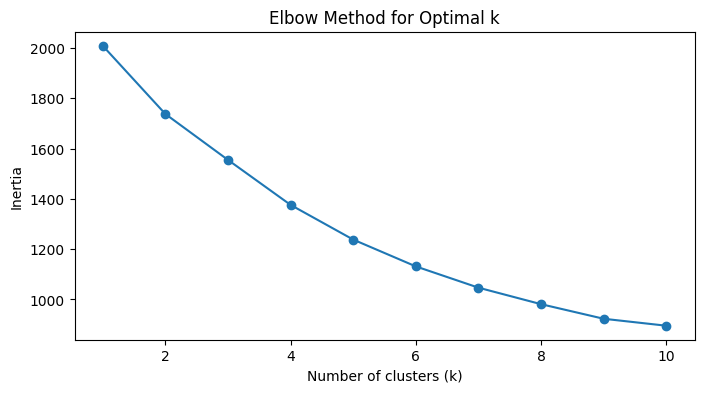

In [36]:
#K-Means Clustering.
from sklearn.cluster import KMeans

X = data[['time', 'creatinine_pk', 'platelets', 'age', 
              'serum_creatinine', 'serum_sodium', 'ejection_fraction']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Elbow method to determine the optimal number of clusters.

inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 99)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8, 4))
plt.plot(k_range, inertia, marker = 'o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [37]:
#Fitting K-Means with 4 clusters.
kmeans = KMeans(n_clusters = 4, random_state = 99)
kmeans.fit(X_scaled)

labels = kmeans.labels_
#Add cluster labels to original data
data['Cluster'] = labels

print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("Cluster Labels Assigned to Data:")
print(data[['Cluster']].head())

X = data[['time', 'creatinine_pk', 'platelets', 'age', 
              'serum_creatinine', 'serum_sodium', 'ejection_fraction']]

Cluster Centers:
[[-0.60802509 -0.15132822 -0.25747804  0.58724394  1.14778942 -1.1316095
  -0.49159251]
 [-0.56861932 -0.32575226  0.08234345  0.25899286 -0.23511147  0.49303564
   0.49373012]
 [ 0.46584101  2.97930336 -0.25625486 -0.3323397  -0.29352986  0.47602196
  -0.06708233]
 [ 0.8527528  -0.17881903  0.09708141 -0.52625739 -0.28055671 -0.05189256
  -0.27559051]]
Cluster Labels Assigned to Data:
   Cluster
0        0
2        0
3        0
5        0
6        0


C:\Users\teleu\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Cluster Descriptions

- **Cluster 0 (Purple):**
 - Older patients with shorter survival times, lower platelet counts, higher serum creatinine,
    significantly lower serum sodium, and lower ejection fraction.
</br>


- **Cluster 1 (Blue):** 
 - Patients with shorter survival times, average platelet counts, slightly higher age, lower serum 
     creatinine, higher serum sodium and ejection fraction.
</br>


- **Cluster 2 (Green):**
 - Patients with longer survival times and significantly higher creatinine phosphokinase levels, lower
     platelet counts, slightly younger age, near-average ejection fraction and serum creatinine     
     levels.
</br>


- **Cluster 3 (Yellow):**
 - Patients with the longest survival times, average creatinine phosphokinase levels, slightly lower
     platelet counts and ejection fraction, younger age, near-average serum creatinine and sodium            levels. 


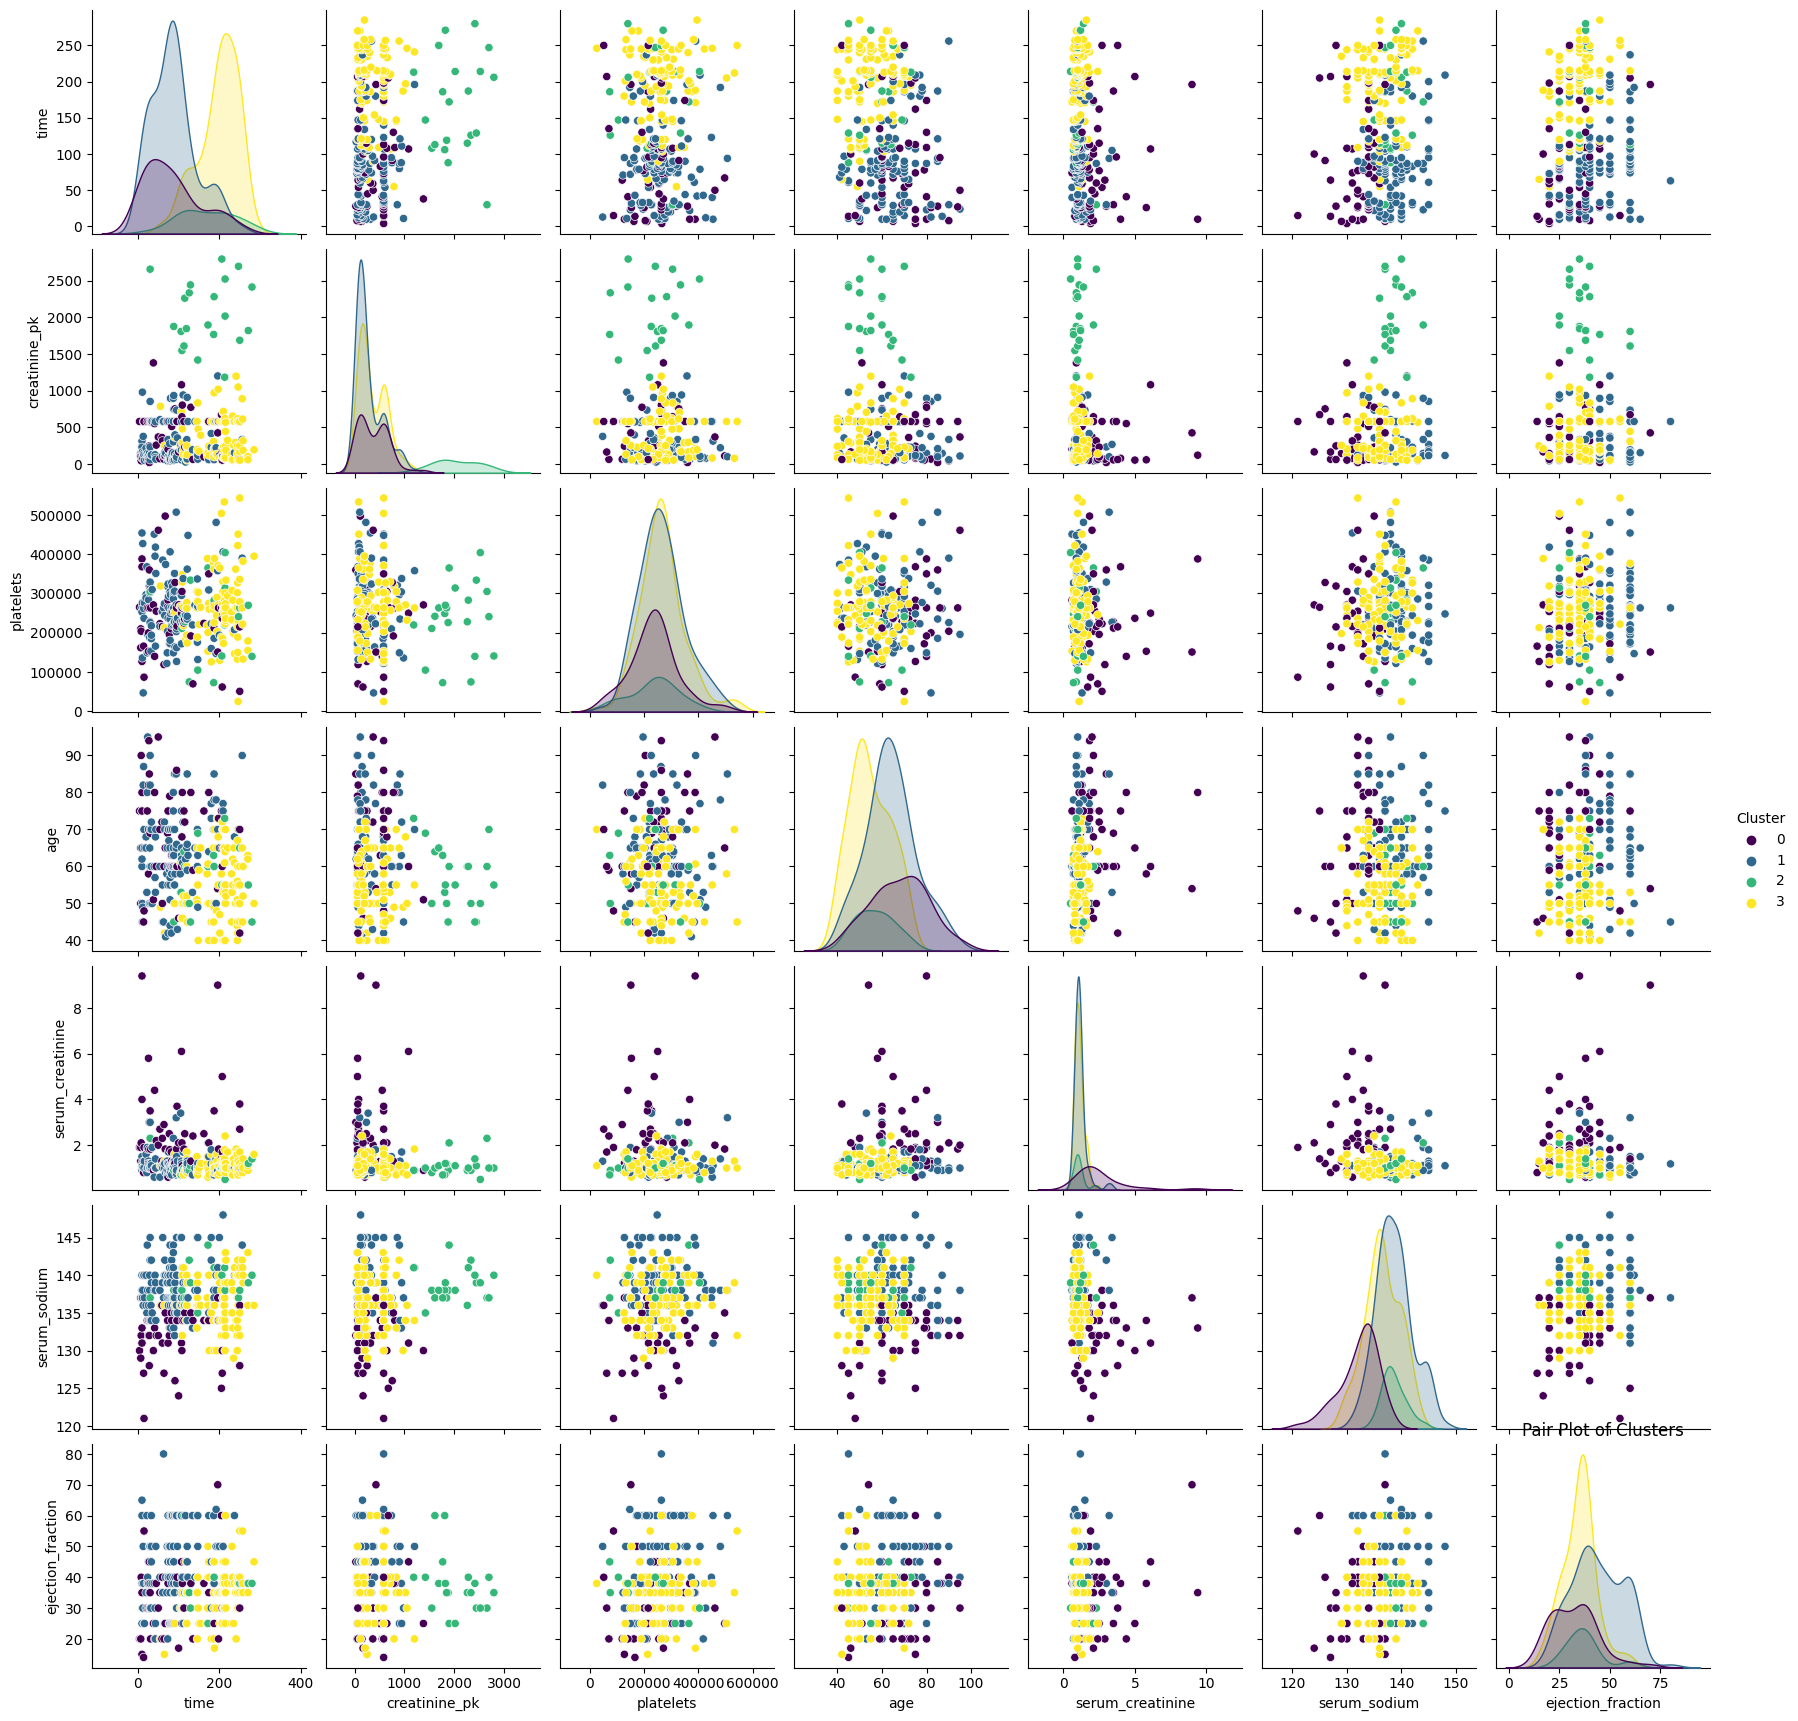

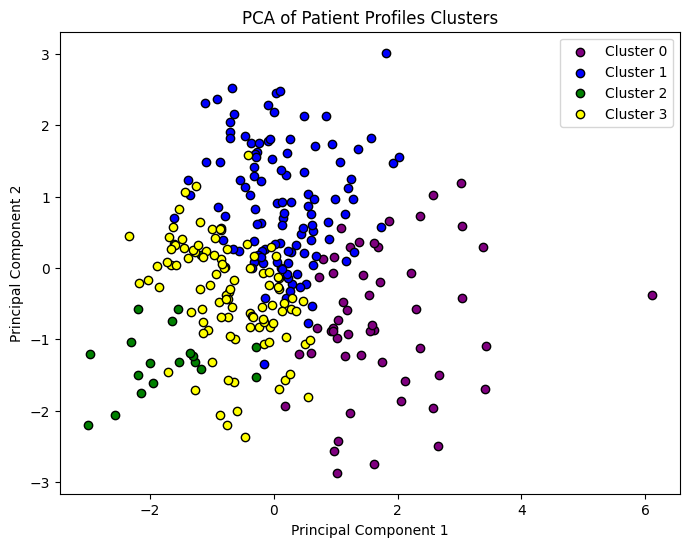

In [38]:
#Visualizing the clusters.
sns.pairplot(data, vars = X, hue = 'Cluster', palette = 'viridis')
plt.title('Pair Plot of Clusters')
plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize = (8,6))
unique_labels = np.unique(labels)
colors = ['purple', 'blue', 'green', 'yellow']
for i,label in enumerate(unique_labels):
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], color = colors[i],
        label = f'Cluster {label}', marker = 'o', edgecolor = 'k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Patient Profiles Clusters')
plt.legend()
plt.show()

In [39]:
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts) #Most observations belong in clusters 0 and 1.

1    112
3    101
0     53
2     21
Name: Cluster, dtype: int64


In [40]:
#Hierarchical Clustering.
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters = 4)
labels = hierarchical.fit_predict(X_scaled)

data['Cluster'] = labels

C:\Users\teleu\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


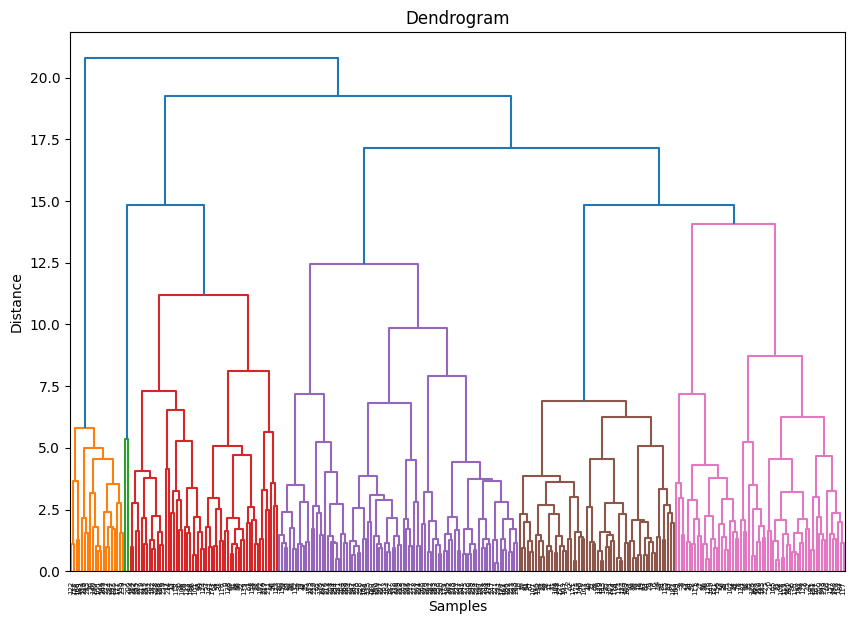

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X_scaled, method = 'ward')

plt.figure(figsize = (10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [42]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("Cluster Labels Assigned to Data:")
print(data[['Cluster']].head())
#The clusters generated by Hierarchical Clustering are nearly identical to those from k-Means Clustering.

Cluster Centers:
[[-0.60802509 -0.15132822 -0.25747804  0.58724394  1.14778942 -1.1316095
  -0.49159251]
 [-0.56861932 -0.32575226  0.08234345  0.25899286 -0.23511147  0.49303564
   0.49373012]
 [ 0.46584101  2.97930336 -0.25625486 -0.3323397  -0.29352986  0.47602196
  -0.06708233]
 [ 0.8527528  -0.17881903  0.09708141 -0.52625739 -0.28055671 -0.05189256
  -0.27559051]]
Cluster Labels Assigned to Data:
   Cluster
0        2
2        2
3        0
5        0
6        0


In [43]:
cluster_counts = data['Cluster'].value_counts()
print("Number of observations in each cluster:")
print(cluster_counts) #Again most observations belong in cluster 0 and 1.

Number of observations in each cluster:
0    121
1     89
2     57
3     20
Name: Cluster, dtype: int64


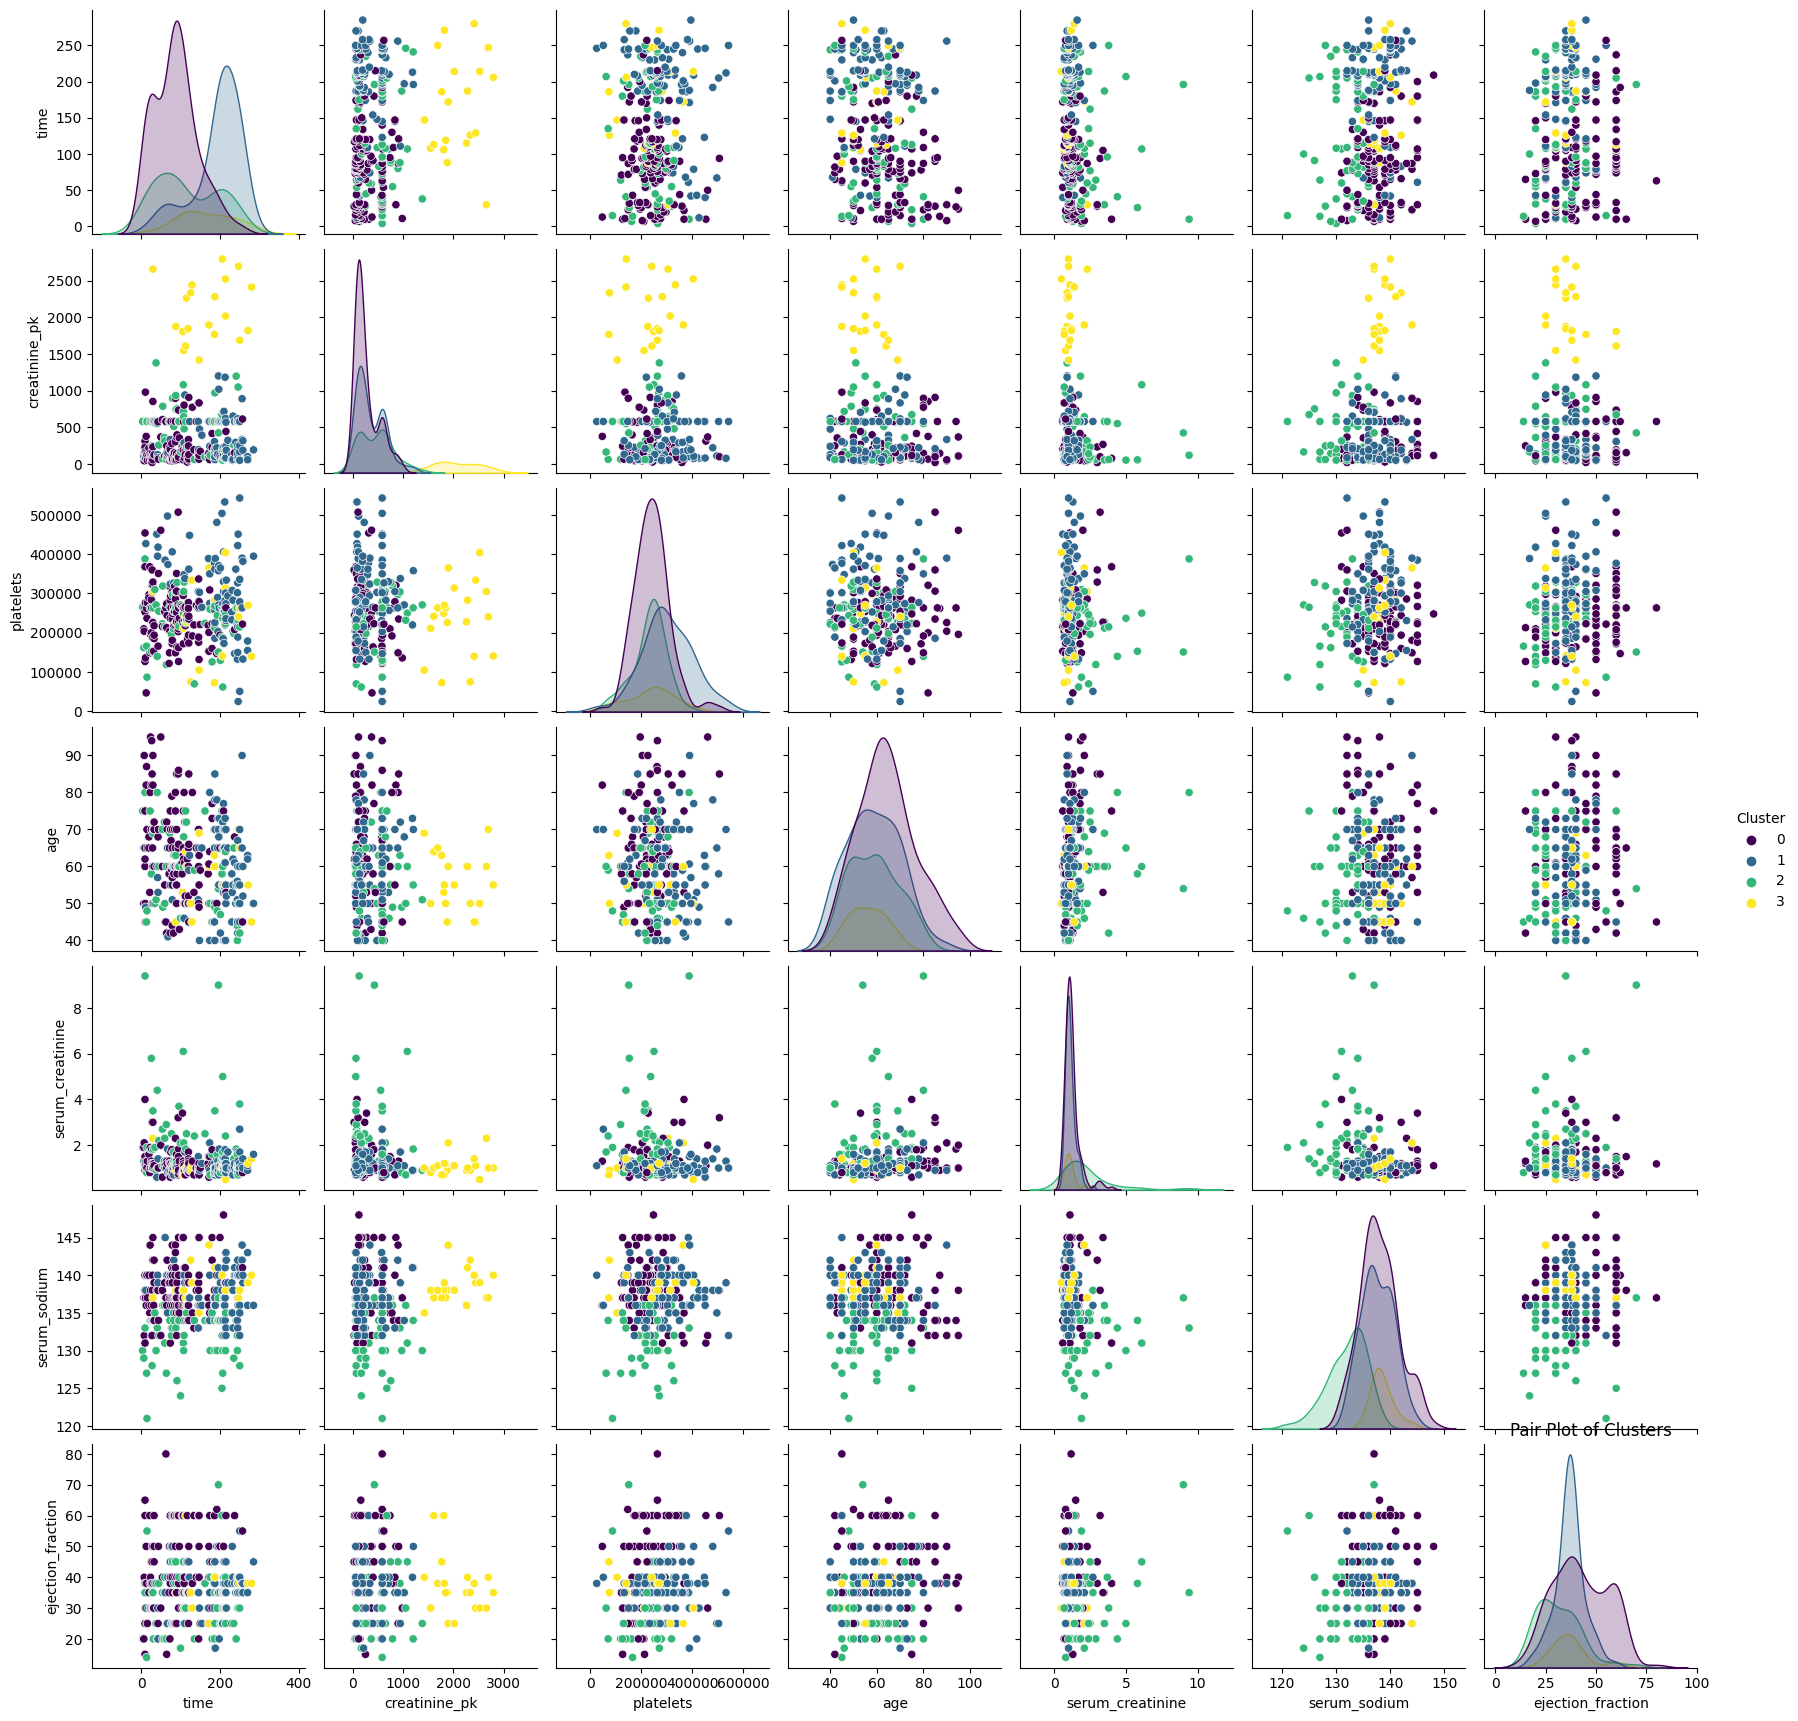

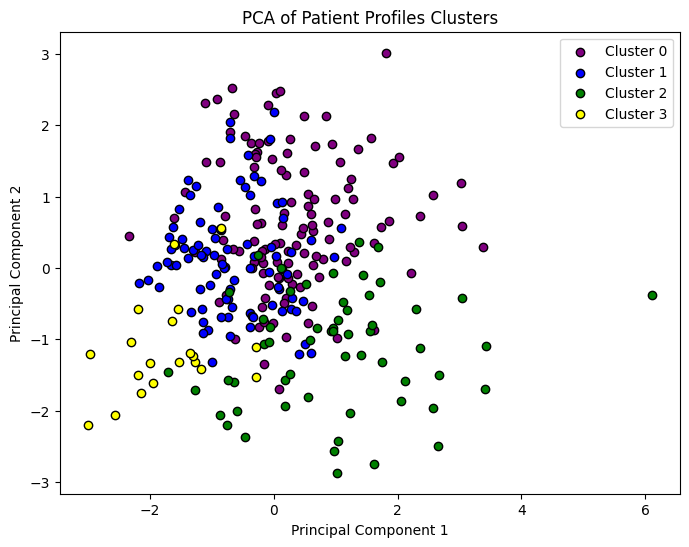

In [44]:
sns.pairplot(data, vars = X, hue = 'Cluster', palette = 'viridis')
plt.title('Pair Plot of Clusters')
plt.show()

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize = (8,6))
unique_labels = np.unique(labels)
colors = ['purple', 'blue', 'green', 'yellow']
for i,label in enumerate(unique_labels):
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], color = colors[i],
        label = f'Cluster {label}', marker = 'o', edgecolor = 'k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Patient Profiles Clusters')
plt.legend()
plt.show()